In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy
from geopy import distance #for distance

In [2]:
%matplotlib inline
df = pd.read_csv('metro-bike-share-trip-data.csv')

/Users/matttuazon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Replaces spaces with _ and get rid of parenthesis 
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
df["Trip_ID"].astype(int)
df["Duration"].astype(int)
df["Start_Time"].astype(str)
df["End_Time"].astype(str)
df["Starting_Station_ID"].astype(float)
df["Starting_Station_Latitude"].astype(float)
df["Starting_Station_Longitude"].astype(float)
df["Ending_Station_ID"].astype(float)
df["Ending_Station_Latitude"].astype(float)
df["Ending_Station_Longitude"].astype(float)
df["Bike_ID"].astype(float)
df["Trip_Route_Category"].astype(str)
df["Passholder_Type"].astype(str)
df["Starting_Lat-Long"].astype(str)
df["Ending_Lat-Long"].astype(str)

0         {'longitude': '-118.23721', 'latitude': '34.05...
1         {'longitude': '-118.23721', 'latitude': '34.05...
2         {'longitude': '-118.24156', 'latitude': '34.05...
3         {'longitude': '-118.24156', 'latitude': '34.05...
4         {'longitude': '-118.25588', 'latitude': '34.04...
5         {'longitude': '-118.23649', 'latitude': '34.03...
6         {'longitude': '-118.23721', 'latitude': '34.05...
7         {'longitude': '-118.25905', 'latitude': '34.04...
8         {'longitude': '-118.25244', 'latitude': '34.04...
9         {'longitude': '-118.23894', 'latitude': '34.06...
10        {'longitude': '-118.2664', 'latitude': '34.039...
11        {'longitude': '-118.25905', 'latitude': '34.04...
12        {'longitude': '-118.24353', 'latitude': '34.05...
13        {'longitude': '-118.26014', 'latitude': '34.04...
14        {'longitude': '-118.24353', 'latitude': '34.05...
15        {'longitude': '-118.25384', 'latitude': '34.04...
16        {'longitude': '-118.2558', 'la

In [5]:
#gets unique values in station ID column
df.Starting_Station_ID.unique()

array([3014., 3016., 3032., 3021., 3022., 3076., 3031., 3063., 3042.,
       3018., 3054., 3006., 3037., 3034., 3005., 3047., 3040., 3066.,
       3033., 3030., 3051., 3019., 3055., 3065., 3068., 3007., 3052.,
       3049., 3075., 3067., 3020., 3035., 3062., 3058., 3045., 3080.,
       3038., 3053., 3069., 3036., 3079., 4108., 3060., 3008., 3056.,
       3029., 3028., 3023., 3025., 3074., 3057., 3027., 3026., 3078.,
       3077., 3059., 3010., 3064., 3046., 3011., 3048., 3081., 3024.,
       3082.,   nan, 3000., 3009., 3039.])

In [6]:
#grabs count of Starting station ID's, we can see location 3069.0 is most popular with 5138 rentals
df.Starting_Station_ID.value_counts()

3069.0    5138
3030.0    5059
3005.0    4883
3064.0    4661
3031.0    4629
3014.0    4571
3042.0    4015
3082.0    3908
3022.0    3893
3067.0    3797
3035.0    3406
3038.0    3306
3055.0    3270
3068.0    3252
3049.0    3154
3034.0    3037
3048.0    3005
3063.0    2949
3007.0    2785
3006.0    2708
3027.0    2557
3032.0    2466
3074.0    2341
3062.0    2325
3052.0    2253
3047.0    2230
3008.0    2156
3075.0    2125
3051.0    2062
3023.0    1980
          ... 
3056.0    1461
3066.0    1425
3046.0    1348
3011.0    1257
3021.0    1254
3018.0    1211
3028.0    1179
3037.0    1174
3036.0    1153
3040.0    1023
3065.0     992
3078.0     879
3054.0     865
3077.0     802
3059.0     742
3033.0     709
3079.0     693
3025.0     626
3081.0     593
3020.0     528
3010.0     427
3060.0     383
3057.0     380
3080.0     191
3045.0     187
3039.0     115
4108.0     108
3009.0      56
3000.0      29
3053.0      13
Name: Starting_Station_ID, Length: 67, dtype: int64

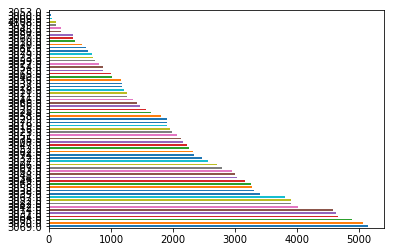

In [13]:
df['Starting_Station_ID'].value_counts().plot(kind='barh')

In [8]:
##grabs count of Ending station ID's, we can see location 3005.0 is most popular with 6262 rentals landed there.
df.Ending_Station_ID.value_counts()

3005.0    6262
3031.0    5517
3014.0    5385
3042.0    5293
3069.0    5072
3082.0    4703
3064.0    4605
3022.0    4337
3030.0    4224
3063.0    3763
3035.0    3513
3067.0    3481
3038.0    3194
3048.0    3156
3034.0    3032
3006.0    2826
3032.0    2778
3023.0    2495
3049.0    2489
3055.0    2460
3074.0    2361
3075.0    2276
3008.0    2242
3062.0    2204
3019.0    2175
3047.0    1994
3007.0    1993
3076.0    1960
3058.0    1944
3051.0    1939
          ... 
3036.0    1424
3018.0    1402
3029.0    1399
3026.0    1212
3066.0    1203
3046.0    1134
3065.0    1016
3068.0     983
3000.0     955
3078.0     883
3054.0     840
3077.0     811
3033.0     778
3024.0     760
3040.0     737
3059.0     722
3079.0     717
3025.0     713
3081.0     644
3020.0     604
3028.0     521
3010.0     412
3057.0     399
3060.0     389
3045.0     319
3080.0     178
4108.0     155
3039.0     115
3009.0      68
3053.0      12
Name: Ending_Station_ID, Length: 67, dtype: int64

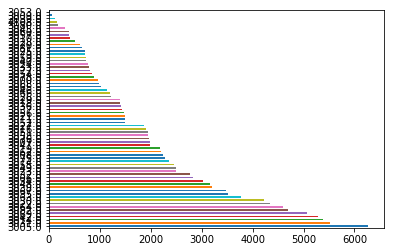

In [14]:
df['Ending_Station_ID'].value_counts().plot(kind='barh')